In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Read the data
df_train = pd.read_csv('folder_filled/train.csv')

In [3]:
df_train.head()

,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,5832,2.0,299000,81913 Calle Torbellino,"Indio, CA",1295.0,2.0,5832
1,5584,3.0,299000,26076 Fiesta Place,"Hemet, CA",1566.0,2.0,5584
2,9408,5.0,499990,34450 Fawn Ridge Place,"Yucaipa, CA",3068.0,3.0,9408
3,4644,4.0,849900,26481 Montebello Place,"Mission Viejo, CA",2230.0,2.1,4644
4,5739,3.0,333490,2562 Red Spruce Lane,"San Jacinto, CA",1898.0,2.0,5739


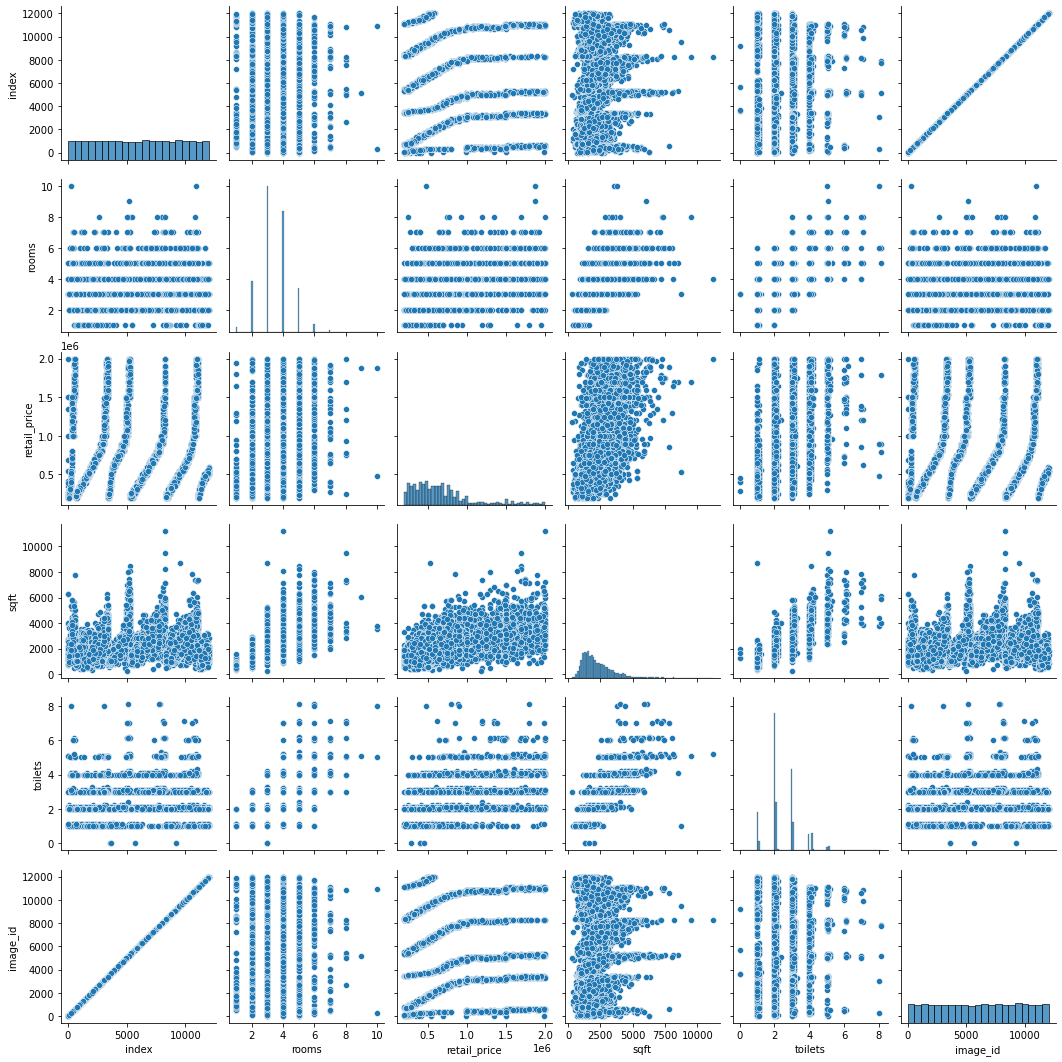

In [4]:
sns.pairplot(df_train)

In [5]:
df_train.corr()

,index,rooms,retail_price,sqft,toilets,image_id
index,1.000000,0.100940,-0.008960,0.167421,0.117337,1.000000
rooms,0.100940,1.000000,0.353616,0.671695,0.671795,0.100940
retail_price,-0.008960,0.353616,1.000000,0.592803,0.522562,-0.008960
sqft,0.167421,0.671695,0.592803,1.000000,0.801854,0.167421
toilets,0.117337,0.671795,0.522562,0.801854,1.000000,0.117337
image_id,1.000000,0.100940,-0.008960,0.167421,0.117337,1.000000


In [27]:
df_train.drop(['toilets'], axis=1, inplace=True)

In [7]:
df_train.head()

,index,rooms,retail_price,address,city,sqft,image_id
0,5832,2.0,299000,81913 Calle Torbellino,"Indio, CA",1295.0,5832
1,5584,3.0,299000,26076 Fiesta Place,"Hemet, CA",1566.0,5584
2,9408,5.0,499990,34450 Fawn Ridge Place,"Yucaipa, CA",3068.0,9408
3,4644,4.0,849900,26481 Montebello Place,"Mission Viejo, CA",2230.0,4644
4,5739,3.0,333490,2562 Red Spruce Lane,"San Jacinto, CA",1898.0,5739


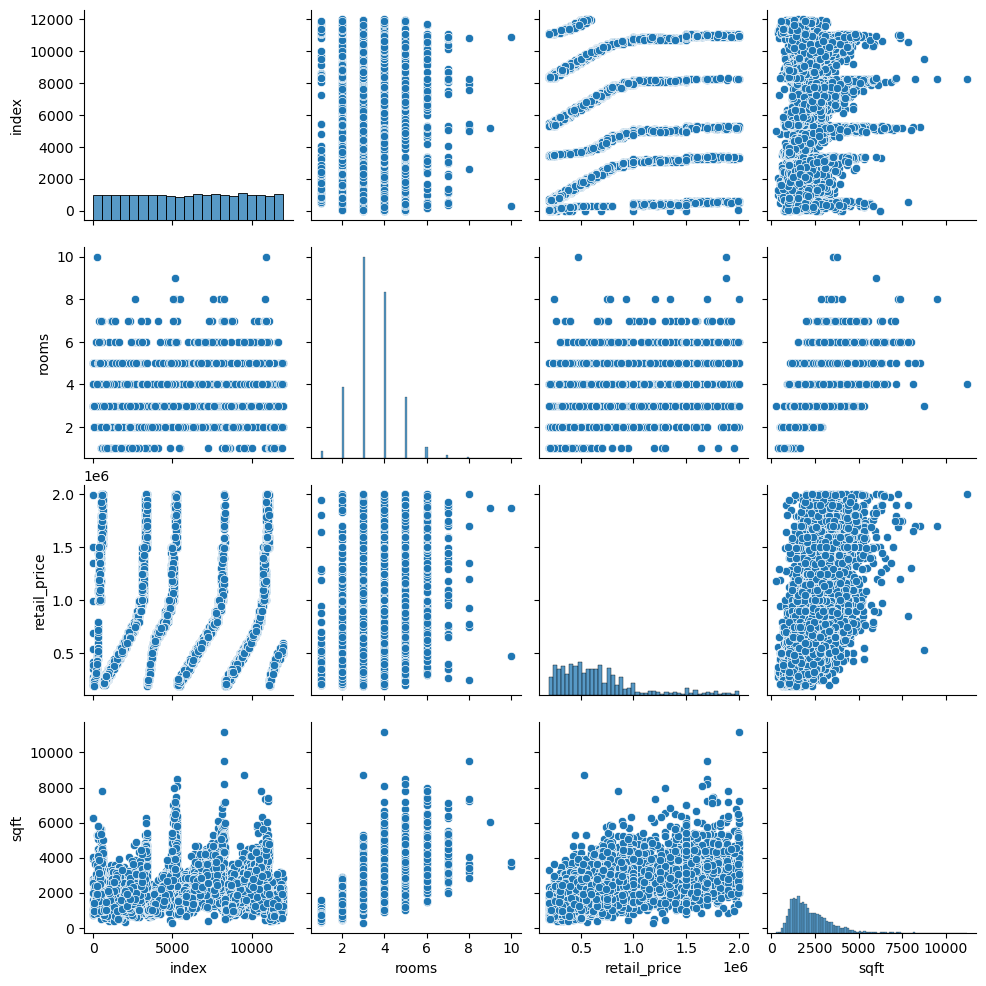

In [10]:
sns.pairplot(df_train)

In [28]:
df_train.drop(['image_id'], axis=1, inplace=True)

In [11]:
!pip install geopandas
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 33.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      Failed to get options via gdal-config: [Errno 2] No such file or directory: 'gdal-config'
      A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output

In [17]:
from geopy.geocoders import Nominatim

In [18]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("81913 Calle Torbellino, Indio, CA")

In [29]:
df_train['address'] = df_train['address'] +', '+ df_train['city']

In [30]:
df_train.head()

,index,rooms,retail_price,address,city,sqft
0,5832,2.0,299000,"81913 Calle Torbellino, Indio, CA","Indio, CA",1295.0
1,5584,3.0,299000,"26076 Fiesta Place, Hemet, CA","Hemet, CA",1566.0
2,9408,5.0,499990,"34450 Fawn Ridge Place, Yucaipa, CA","Yucaipa, CA",3068.0
3,4644,4.0,849900,"26481 Montebello Place, Mission Viejo, CA","Mission Viejo, CA",2230.0
4,5739,3.0,333490,"2562 Red Spruce Lane, San Jacinto, CA","San Jacinto, CA",1898.0


In [32]:
def get_lat(address):
    try:
        location = locator.geocode(address)
        return location.latitude
    except:
        return np.nan

In [33]:
df_train['latitude'] = df_train['address'].apply(get_lat)

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         8400 non-null   int64  
 1   rooms         8204 non-null   float64
 2   retail_price  8400 non-null   int64  
 3   address       8400 non-null   object 
 4   city          8400 non-null   object 
 5   sqft          8253 non-null   float64
 6   latitude      6424 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 459.5+ KB


In [35]:
df_train.head()

,index,rooms,retail_price,address,city,sqft,latitude
0,5832,2.0,299000,"81913 Calle Torbellino, Indio, CA","Indio, CA",1295.0,33.760798
1,5584,3.0,299000,"26076 Fiesta Place, Hemet, CA","Hemet, CA",1566.0,NaN
2,9408,5.0,499990,"34450 Fawn Ridge Place, Yucaipa, CA","Yucaipa, CA",3068.0,34.046050
3,4644,4.0,849900,"26481 Montebello Place, Mission Viejo, CA","Mission Viejo, CA",2230.0,33.620041
4,5739,3.0,333490,"2562 Red Spruce Lane, San Jacinto, CA","San Jacinto, CA",1898.0,NaN


In [36]:
df_train.dropna(inplace=True)

In [37]:
df_train.head()

,index,rooms,retail_price,address,city,sqft,latitude
0,5832,2.0,299000,"81913 Calle Torbellino, Indio, CA","Indio, CA",1295.0,33.760798
2,9408,5.0,499990,"34450 Fawn Ridge Place, Yucaipa, CA","Yucaipa, CA",3068.0,34.046050
3,4644,4.0,849900,"26481 Montebello Place, Mission Viejo, CA","Mission Viejo, CA",2230.0,33.620041
5,10908,5.0,1600000,"3445 Trumbull St, San Diego, CA","San Diego, CA",3128.0,32.723187
7,7472,3.0,719000,"44834 Doral Drive, Indian Wells, CA","Indian Wells, CA",2855.0,33.726808


In [38]:
df_train.drop(['address','city'], axis=1, inplace=True)

In [39]:
df_train.head()

,index,rooms,retail_price,sqft,latitude
0,5832,2.0,299000,1295.0,33.760798
2,9408,5.0,499990,3068.0,34.046050
3,4644,4.0,849900,2230.0,33.620041
5,10908,5.0,1600000,3128.0,32.723187
7,7472,3.0,719000,2855.0,33.726808


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6163 entries, 0 to 8399
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         6163 non-null   int64  
 1   rooms         6163 non-null   float64
 2   retail_price  6163 non-null   int64  
 3   sqft          6163 non-null   float64
 4   latitude      6163 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 288.9 KB
